In [ ]:
!pip install lxml
!pip install geopy
!pip install folium

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
import folium

Title                    object
Involved Countries       object
Headquarter              object
Established             float64
Products                 object
Traded Volume (2015)     object
Shortest Tradeunit       object
Currency                 object
dtype: object


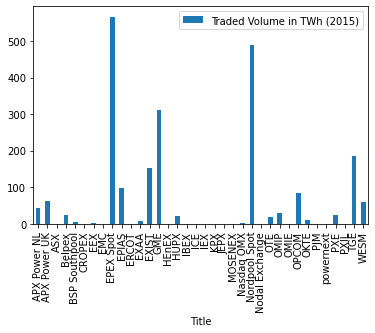

In [3]:
data_frame = pd.read_html('https://www.next-kraftwerke.com/knowledge/power-exchanges-list')
data_frame=data_frame[0]
data_frame.pop("Additional Information")
##print(data_frame)

#

print(data_frame.dtypes)

col_to_check = ['Traded Volume (2015)']

data_frame[col_to_check]=data_frame[col_to_check].replace({' TWh':''}, regex=True)
data_frame[col_to_check]=data_frame[col_to_check].replace({'/':'0'}, regex=True)
data_frame[col_to_check]=data_frame[col_to_check].fillna(0)
data_frame.iloc[12, data_frame.columns.get_loc('Traded Volume (2015)')]= '152,32'
data_frame[col_to_check]=data_frame[col_to_check].replace({',':'.'}, regex=True)



#print(data_frame['Traded Volume (2015)'])
data_frame['Traded Volume (2015)'] = data_frame['Traded Volume (2015)'].astype('float')

data_frame.rename(columns={'Traded Volume (2015)': 'Traded Volume in TWh (2015)'}, inplace=True)

bar_chart = data_frame.plot.bar(x='Title',y= 'Traded Volume in TWh (2015)', rot = 0)

bar_chart=plt.xticks(rotation=90)

In [4]:
latitudes =[]
longitudes = []

locations_not_found = []

locations_new = data_frame['Headquarter']


for i in range(len(locations_new)):
    address = locations_new[i]
    geolocator = Nominatim(user_agent="world_explorer")
    location = geolocator.geocode(address)
    if location is not None:
        latitude = location.latitude
        longitude = location.longitude
        latitudes.append(latitude)
        longitudes.append(longitude)
        print('The coordinates for {} are {} and {}'.format(locations_new[i], latitude, longitude))
    else:
        latitudes.insert(i, float(0))
        longitudes.insert(i, float(0))
        locations_not_found.insert(i, '{}'.format(locations_new[i]))
        print('No location found for {}'.format(locations_new[i]))

The coordinates for Amsterdam (NL) are 52.3727598 and 4.8936041
The coordinates for London (GB) are 51.5073219 and -0.1276474
The coordinates for Sydney (AU) are -33.8548157 and 151.2164539
The coordinates for Brussels (BE) are 50.8465573 and 4.351697
The coordinates for Ljubljana (SL) are 46.048968 and 14.503294034207364
The coordinates for Zagreb (HV) are 45.80728 and 15.7166515
The coordinates for Leipzig (GER) are -31.381143 and -64.1525123
The coordinates for Singapore (SG) are 1.357107 and 103.8194992
The coordinates for Paris (FRA) are 39.95741 and -82.817483
The coordinates for Istanbul (TR) are 41.0096334 and 28.9651646
The coordinates for nan are 46.3144754 and 11.0480288
The coordinates for Vienna (AT) are 48.2083537 and 16.3725042
The coordinates for Istanbul (TR) are 41.0096334 and 28.9651646
The coordinates for Rome (IT) are 41.8933203 and 12.4829321
No location found for Athens (GD)
The coordinates for Budapest (HU) are 47.4979937 and 19.0403594
The coordinates for Sofia

In [5]:
print(locations_not_found)

['Athens (GD)', 'Bratislava (SL)']


In [6]:
for i in range(len(locations_new)):
    if locations_new[i] == 'Athens (GD)':
        print(i)
    elif locations_new[i] == 'Bratislava (SL)':
        print(i)

14
29


In [7]:
##Latitude and longitude values for Athens (GD) are 37.983810 & 23.727539

##Latitude and longitude values for Bratislava (SL) are 48.148598 & 17.107748 

latitudes[14] = 37.983810
longitudes[14] =23.727539
latitudes[29] = 48.148598
longitudes[29] = 17.107748


In [8]:
data_frame_locations = pd.DataFrame(list(zip(locations_new,latitudes,longitudes)),columns=['Locations', 'Latitude', 'Longitude'])

In [9]:
print(data_frame_locations)

             Locations   Latitude   Longitude
0       Amsterdam (NL)  52.372760    4.893604
1          London (GB)  51.507322   -0.127647
2          Sydney (AU) -33.854816  151.216454
3        Brussels (BE)  50.846557    4.351697
4       Ljubljana (SL)  46.048968   14.503294
5          Zagreb (HV)  45.807280   15.716651
6        Leipzig (GER) -31.381143  -64.152512
7       Singapore (SG)   1.357107  103.819499
8          Paris (FRA)  39.957410  -82.817483
9        Istanbul (TR)  41.009633   28.965165
10                 NaN  46.314475   11.048029
11         Vienna (AT)  48.208354   16.372504
12       Istanbul (TR)  41.009633   28.965165
13           Rome (IT)  41.893320   12.482932
14         Athens (GD)  37.983810   23.727539
15       Budapest (HU)  47.497994   19.040359
16          Sofia (BG)  42.697863   23.322179
17                 NaN  46.314475   11.048029
18      New,Delhi (IN)  52.408828   13.359461
19        Naju-si (KR)  35.015886  126.710831
20          Tokyo (JP)  35.682839 

In [10]:
Traded_Power = data_frame['Traded Volume in TWh (2015)']
print(Traded_Power)

0      44.000
1      62.000
2       0.000
3      24.000
4       6.000
5       0.000
6       2.537
7       0.000
8     566.000
9      99.000
10      0.000
11      8.000
12    152.320
13    312.000
14      0.000
15     22.000
16      0.000
17      0.000
18      0.000
19      0.000
20      0.000
21      0.000
22      1.496
23    489.000
24      0.000
25     20.000
26     30.000
27      0.000
28     85.000
29     10.000
30      0.000
31      1.024
32     24.000
33      0.000
34    186.000
35     60.700
Name: Traded Volume in TWh (2015), dtype: float64


In [11]:
data_frame_locations['Traded Power']=Traded_Power

In [12]:
print(data_frame_locations)

             Locations   Latitude   Longitude  Traded Power
0       Amsterdam (NL)  52.372760    4.893604        44.000
1          London (GB)  51.507322   -0.127647        62.000
2          Sydney (AU) -33.854816  151.216454         0.000
3        Brussels (BE)  50.846557    4.351697        24.000
4       Ljubljana (SL)  46.048968   14.503294         6.000
5          Zagreb (HV)  45.807280   15.716651         0.000
6        Leipzig (GER) -31.381143  -64.152512         2.537
7       Singapore (SG)   1.357107  103.819499         0.000
8          Paris (FRA)  39.957410  -82.817483       566.000
9        Istanbul (TR)  41.009633   28.965165        99.000
10                 NaN  46.314475   11.048029         0.000
11         Vienna (AT)  48.208354   16.372504         8.000
12       Istanbul (TR)  41.009633   28.965165       152.320
13           Rome (IT)  41.893320   12.482932       312.000
14         Athens (GD)  37.983810   23.727539         0.000
15       Budapest (HU)  47.497994   19.0

In [13]:
data_frame_locations.dropna(subset=['Locations'], inplace=True)
        

In [14]:
print(data_frame_locations)

             Locations   Latitude   Longitude  Traded Power
0       Amsterdam (NL)  52.372760    4.893604        44.000
1          London (GB)  51.507322   -0.127647        62.000
2          Sydney (AU) -33.854816  151.216454         0.000
3        Brussels (BE)  50.846557    4.351697        24.000
4       Ljubljana (SL)  46.048968   14.503294         6.000
5          Zagreb (HV)  45.807280   15.716651         0.000
6        Leipzig (GER) -31.381143  -64.152512         2.537
7       Singapore (SG)   1.357107  103.819499         0.000
8          Paris (FRA)  39.957410  -82.817483       566.000
9        Istanbul (TR)  41.009633   28.965165        99.000
11         Vienna (AT)  48.208354   16.372504         8.000
12       Istanbul (TR)  41.009633   28.965165       152.320
13           Rome (IT)  41.893320   12.482932       312.000
14         Athens (GD)  37.983810   23.727539         0.000
15       Budapest (HU)  47.497994   19.040359        22.000
16          Sofia (BG)  42.697863   23.3

In [15]:
data_frame_locations['Latitude'][8] = data_frame_locations['Latitude'][31]
data_frame_locations['Longitude'][8] = data_frame_locations['Longitude'][31]
print(data_frame_locations)

             Locations   Latitude   Longitude  Traded Power
0       Amsterdam (NL)  52.372760    4.893604        44.000
1          London (GB)  51.507322   -0.127647        62.000
2          Sydney (AU) -33.854816  151.216454         0.000
3        Brussels (BE)  50.846557    4.351697        24.000
4       Ljubljana (SL)  46.048968   14.503294         6.000
5          Zagreb (HV)  45.807280   15.716651         0.000
6        Leipzig (GER) -31.381143  -64.152512         2.537
7       Singapore (SG)   1.357107  103.819499         0.000
8          Paris (FRA)  48.856697    2.351462       566.000
9        Istanbul (TR)  41.009633   28.965165        99.000
11         Vienna (AT)  48.208354   16.372504         8.000
12       Istanbul (TR)  41.009633   28.965165       152.320
13           Rome (IT)  41.893320   12.482932       312.000
14         Athens (GD)  37.983810   23.727539         0.000
15       Budapest (HU)  47.497994   19.040359        22.000
16          Sofia (BG)  42.697863   23.3

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
map_energy_word = folium.Map(location = [51.477928, 0], zoom_start =3)


for lat, lng, locations, power in zip(data_frame_locations['Latitude'], data_frame_locations['Longitude'], data_frame_locations['Locations'], data_frame_locations['Traded Power']):
    label = '{} TWh'.format(power)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color= 'yellow',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_energy_word) 



map_energy_word

In [36]:
power_data=data_frame_locations['Traded Power']
locations_data=data_frame_locations
locations_data.pop('Locations')
locations_data.pop('Traded Power')


0      44.000
1      62.000
2       0.000
3      24.000
4       6.000
5       0.000
6       2.537
7       0.000
8     566.000
9      99.000
11      8.000
12    152.320
13    312.000
14      0.000
15     22.000
16      0.000
18      0.000
19      0.000
20      0.000
21      0.000
22      1.496
23    489.000
24      0.000
25     20.000
26     30.000
27      0.000
28     85.000
29     10.000
30      0.000
31      1.024
32     24.000
33      0.000
34    186.000
35     60.700
Name: Traded Power, dtype: float64

In [37]:
locations_data

,Latitude,Longitude
0,52.372760,4.893604
1,51.507322,-0.127647
2,-33.854816,151.216454
3,50.846557,4.351697
4,46.048968,14.503294
5,45.807280,15.716651
6,-31.381143,-64.152512
7,1.357107,103.819499
8,48.856697,2.351462
9,41.009633,28.965165


In [40]:
m = folium.Map(location=[51.477928, 0], zoom_start=3)

folium.Choropleth(
    geo_data=locations_data,
    name="choropleth",
    data=power_data,
    columns=["Locations", "Traded Power"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Traded Power (TWh)",
).add_to(m)

folium.LayerControl().add_to(m)

m

ValueError: Cannot render objects with any missing geometries:      Latitude   Longitude
0   52.372760    4.893604
1   51.507322   -0.127647
2  -33.854816  151.216454
3   50.846557    4.351697
4   46.048968   14.503294
5   45.807280   15.716651
6  -31.381143  -64.152512
7    1.357107  103.819499
8   48.856697    2.351462
9   41.009633   28.965165
11  48.208354   16.372504
12  41.009633   28.965165
13  41.893320   12.482932
14  37.983810   23.727539
15  47.497994   19.040359
16  42.697863   23.322179
18  52.408828   13.359461
19  35.015886  126.710831
20  35.682839  139.759455
21  55.750446   37.617494
22  40.712728  -74.006015
23  59.913013   10.636563
24  38.916509  -77.225786
25  50.059629   14.446459
26  38.707751   -9.136592
27  40.416705   -3.703582
28  44.436141   26.102720
29  48.148598   17.107748
30  41.670205  -94.910653
31  48.856697    2.351462
32  50.059629   14.446459
33  19.075990   72.877393
34  48.296773  -97.256317
35  14.559482  121.081237